# Documentation

This notebook executes the `AngleAnalyzer` algorithm class. The `AngleAnalyzer` class is designed to analyze flight trajectories at a specific point by examining the angles between successive points. It reads flight data from a CSV file and calculates angles between points, determining if they form a straight line or a curve. Using provided thresholds, it extracts past and future coordinates, filters out zero angles, and performs both angle-based and linear regression analyses. These analyses help classify flight segments as either straight lines or curves. 

Input:
- `.csv` file of format (processed using `FileConverter`) `timestamp [UTC],relative altitude [m],horizontal velocity [m/s],vertical velocity [m/s],distance to takeoff [km],longitude,latitude`

Output:
- None

# Imports

In [28]:
import os
import sys
import pandas as pd

# AI content (GitHub Copilot, 02/07/2024), verified and adapted by Nicolas Huber.
src_directory: str = os.path.join(os.getcwd(), "..")
sys.path.append(src_directory)

import constants as constants
import helpers.data_visualizer as datavisualizer
import algorithms.angle_analyzer as angleanalyzer

# Variables

In [29]:
INDEX: int = 400
CSV_FILE: str = "CSV_FILE"

# Initialisation

In [30]:
Analyzer: angleanalyzer.AngleAnalyzer = angleanalyzer.AngleAnalyzer(
    csv_file=CSV_FILE,
    latest_threshold=constants.ANGLE_PAST_THRESHOLD,
    future_threshold=constants.ANGLE_FUTURE_THRESHOLD,
    angle_threshold=constants.ANGLE_THRESHOLD,
    linear_regression_threshold=constants.LINEAR_REGRESSION_THRESHOLD
)
Visualizer: datavisualizer.DataVisualizer = datavisualizer.DataVisualizer()

# Data Import

In [31]:
data: pd.DataFrame = Analyzer.read_csv_file()

print("lenght: " + str(len(data)))
print()
print(data)

lenght: 3959

     timestamp [UTC]  relative altitude [m]  horizontal velocity [m/s]  \
0           10:54:46                 -163.0                      15.28   
1           10:54:47                 -164.0                      13.89   
2           10:54:48                 -163.0                      12.50   
3           10:54:49                 -163.0                      11.39   
4           10:54:50                 -163.0                      11.39   
...              ...                    ...                        ...   
3954        11:09:54                 -484.0                       9.72   
3955        11:09:55                 -485.0                      10.56   
3956        11:09:56                 -486.0                      10.56   
3957        11:09:57                 -487.0                      11.67   
3958        11:09:58                 -488.0                       9.44   

      vertical velocity [m/s]  distance to takeoff [km]  longitude   latitude  
0                

# Analyze Coordintes

In [32]:
latest_coordinates: pd.DataFrame = Analyzer.extract_latest_coordinates(df=data, i=INDEX)
future_coordinates: pd.DataFrame = Analyzer.extract_future_coordinates(df=data, i=INDEX)

print("Past Coordinates")
print("--> lenght: " + str(len(latest_coordinates)))
print()
print(latest_coordinates)
print()

print("Future Coordinates")
print("--> lenght: " + str(len(future_coordinates)))
print()
print(future_coordinates)

Past Coordinates
--> lenght: 95

     timestamp [UTC]  relative altitude [m]  horizontal velocity [m/s]  \
1106        11:13:12                 -523.0                      10.28   
1107        11:13:13                 -524.0                       8.89   
1108        11:13:14                 -526.0                      10.28   
1109        11:13:15                 -527.0                      10.00   
1110        11:13:16                 -527.0                      10.00   
...              ...                    ...                        ...   
1196        11:14:42                 -657.0                       7.50   
1197        11:14:43                 -657.0                       5.28   
1198        11:14:44                 -659.0                       7.78   
1199        11:14:45                 -660.0                       9.44   
1200        11:14:46                 -662.0                      11.39   

      vertical velocity [m/s]  distance to takeoff [km]  longitude   latitude 

# Calculate Angles

In [33]:
angles_past: pd.DataFrame = Analyzer.cut_zero_angles(
    Analyzer.calculate_angles(df=latest_coordinates)
)
angles_future: pd.DataFrame = Analyzer.cut_zero_angles(
    Analyzer.calculate_angles(df=future_coordinates)
)

print("Past Angles")
print("--> lenght: " + str(len(angles_past)))
print()
print(angles_past)

print()

print("Future Angles")
print("--> lenght: " + str(len(angles_future)))
print()
print(angles_future)

Past Angles
--> lenght: 91

   timestamp  altitude  horizontal  vertical  distance  longitude   latitude  \
2   11:13:14    -526.0       10.28      -2.0      7.74   9.357500  47.213683   
3   11:13:15    -527.0       10.00      -1.0      7.74   9.357366  47.213700   
4   11:13:16    -527.0       10.00       0.0      7.73   9.357233  47.213700   
5   11:13:17    -528.0        7.78      -1.0      7.73   9.357100  47.213700   
6   11:13:18    -528.0        8.89       0.0      7.73   9.357000  47.213716   
..       ...       ...         ...       ...       ...        ...        ...   
88  11:14:40    -660.0       11.39       1.0      7.17   9.347883  47.211416   
89  11:14:41    -658.0        7.78       2.0      7.16   9.347733  47.211416   
90  11:14:42    -657.0        7.50       1.0      7.16   9.347633  47.211433   
91  11:14:43    -657.0        5.28       0.0      7.16   9.347533  47.211433   
92  11:14:44    -659.0        7.78      -2.0      7.15   9.347466  47.211416   

        ang

# Visualisation

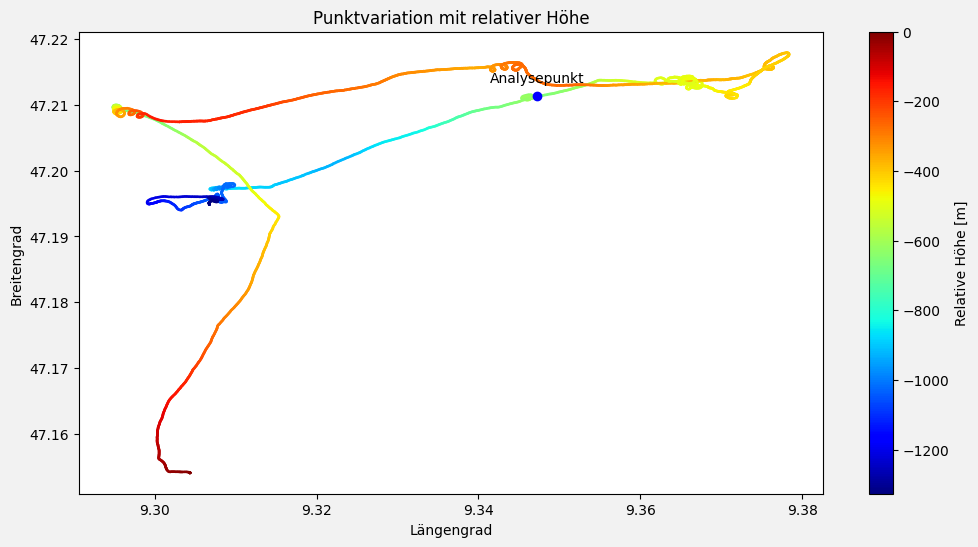

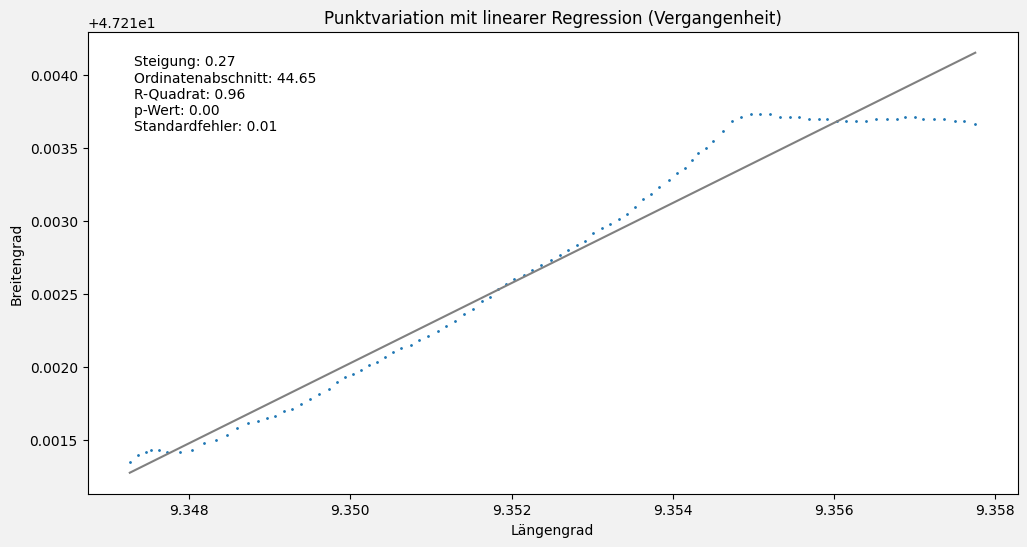

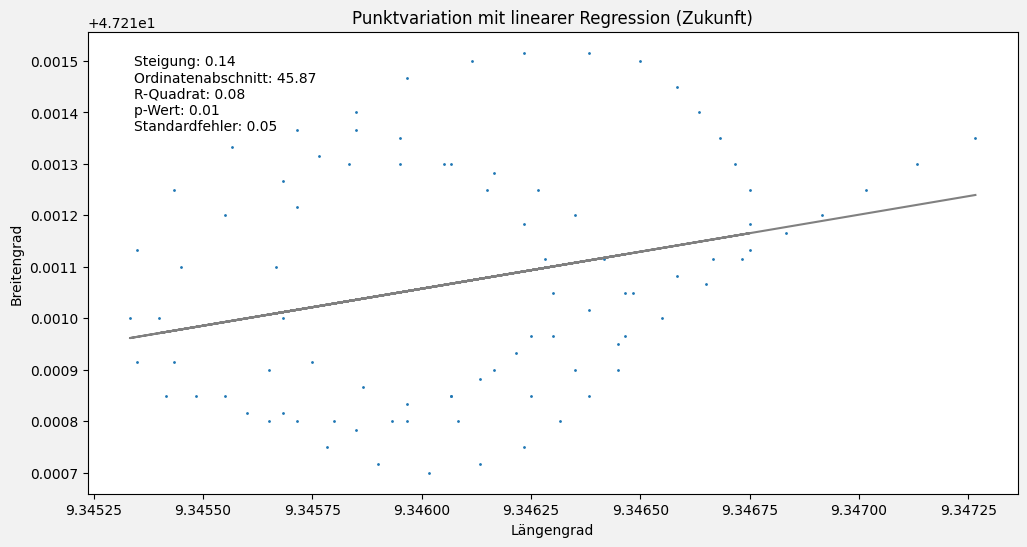

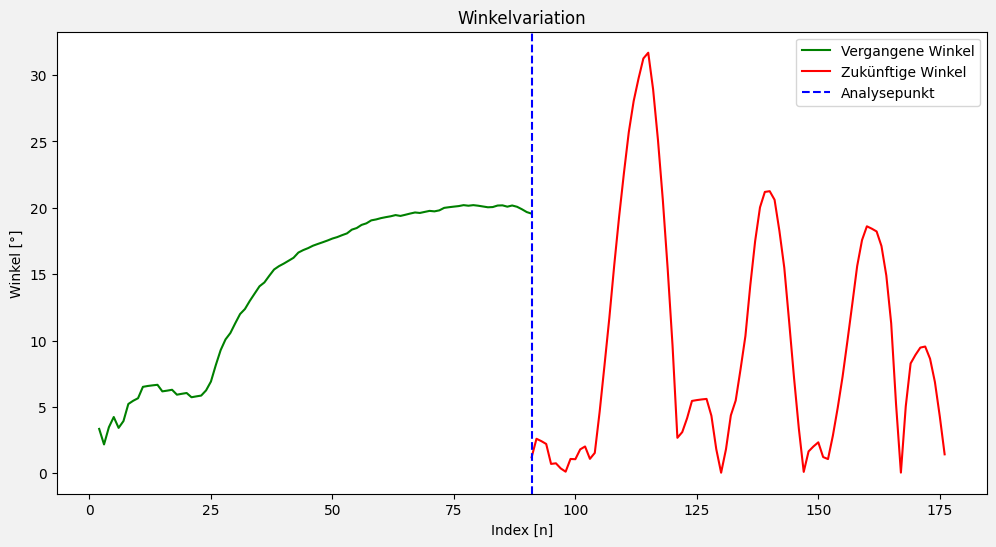

In [34]:
Visualizer.visualize_points_colored(df=data, relative=INDEX)
Visualizer.visualize_points_2d(df=latest_coordinates, relative=0, linear=True, title="Vergangenheit")
Visualizer.visualize_points_2d(df=future_coordinates, relative=0, linear=True, title="Zukunft")
Visualizer.visualize_angles(past_angles=angles_past, future_angles=angles_future)

# Analysis

In [35]:
status_angle_past: bool = Analyzer.analyze_angles(angles=angles_past)
status_angle_future: bool = Analyzer.analyze_angles(angles=angles_future)
(
    status_regression_past,
    slope_past,
    intercept_past,
    r_value_past,
    p_value_past,
    std_err_past,
) = Analyzer.analyze_linear_regression(df=latest_coordinates)
(
    status_regression_future,
    slope_future,
    intercept_future,
    r_value_future,
    p_value_future,
    std_err_future,
) = Analyzer.analyze_linear_regression(df=future_coordinates)

print("Angle Analysis")
print("--> Past: " + str(status_angle_past))
print("--> Future: " + str(status_angle_future))

print()

print("Past Linear Regression")
print("--> Status: " + str(status_regression_past))
print("--> Slope: " + str(slope_past))
print("--> Intercept: " + str(intercept_past))
print("--> R-Value: " + str(r_value_past))
print("--> P-Value: " + str(p_value_past))
print("--> Standard Error: " + str(std_err_past))

print()

print("Future Linear Regression")
print("--> Status: " + str(status_regression_future))
print("--> Slope: " + str(slope_future))
print("--> Intercept: " + str(intercept_future))
print("--> R-Value: " + str(r_value_future))
print("--> P-Value: " + str(p_value_future))
print("--> Standard Error: " + str(std_err_future))

print()

print("Data Analysis")
print(
    f"--> Status: {Analyzer.analyze_data(status_angle_past, status_regression_past, status_angle_future, status_regression_future)}"
)

Angle Analysis
--> Past: True
--> Future: True

Past Linear Regression
--> Status: True
--> Slope: 0.2744837002647483
--> Intercept: 44.645603877646536
--> R-Value: 0.9804671923045835
--> P-Value: 1.7586017853659123e-67
--> Standard Error: 0.0057096328529211765

Future Linear Regression
--> Status: False
--> Slope: 0.14381856004819482
--> Intercept: 45.86692926914368
--> R-Value: 0.28515981665523454
--> P-Value: 0.0064446350927744745
--> Standard Error: 0.05153097041139202

Data Analysis
--> Status: (False, 'Curve / Overlap / Error', 1)


# System Info

In [36]:
print(f"@ Author {constants.AUTHOR}")
print(f"@ Author Email {constants.AUTHOR_EMAIL}")
print(f"@ Author URL {constants.AUTHOR_URL}")
print(f"@ GitHub URL {constants.GITHUB_URL}")

@ Author Nicolas Huber
@ Author Email info@nicolas-huber.ch
@ Author URL https://nicolas-huber.ch
@ GitHub URL https://github.com/nicolashuberIT/flight-analyzer
